**Chapter 10 – Introduction to Artificial Neural Networks - Part 2**

## Using TensorFlow Keras `dense()` function

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler
from tensorflow.keras import datasets, layers, models

import datetime

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


## MNIST 데이터셋 임포트하기

In [2]:
# data read and node decaration
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# Flattened 1D data
X_train_1d = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test_1d = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train_1d = y_train.astype(np.int32)
y_test_1d = y_test.astype(np.int32)

# 2D train data 60000 -> validation 5000 + train 55000
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

print(X_train.shape, y_train.shape)
print(X_train_1d.shape)
print("X_train[0]=", X_train[0])
print("y_train[0]=", y_train[0])
len(y_test)

(55000, 28, 28) (55000,)
(60000, 784)
X_train[0]= [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  97  96  77 118  61   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 

10000

load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됩니다:

* `X_train`과 `y_train` 배열은 모델 학습에 사용되는 *training dataset*입니다.
* `X_test`와 `y_test` 배열은 모델 테스트에 사용되는 *test dataset*입니다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. *레이블*(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 숫자를 나타냅니다:
<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>1</td>
    <td>1</td>
  </tr>
    <tr>
    <td>2</td>
    <td>2</td>
  </tr>
    <tr>
    <td>3</td>
    <td>3</td>
  </tr>
    <tr>
    <td>4</td>
    <td>4</td>
  </tr>
    <tr>
    <td>5</td>
    <td>5</td>
  </tr>
    <tr>
    <td>6</td>
    <td>6</td>
  </tr>
    <tr>
    <td>7</td>
    <td>7</td>
  </tr>
    <tr>
    <td>8</td>
    <td>8</td>
  </tr>
    <tr>
    <td>9</td>
    <td>9</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있습니다. 데이터셋에 *클래스 이름*이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다:

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

## 데이터 탐색

모델을 훈련하기 전에 데이터셋 구조를 살펴보죠. 다음 코드는 훈련 세트에 55,000개의 이미지가 있다는 것을 보여줍니다. 각 이미지는 28x28 픽셀로 표현됩니다:

In [4]:
X_train.shape

(55000, 28, 28)

비슷하게 훈련 세트에는 55,000개의 레이블이 있습니다:

In [5]:
len(y_train)

55000

각 레이블은 0과 9사이의 정수입니다:

In [6]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

테스트 세트에는 10,000개의 이미지가 있습니다. 이 이미지도 28x28 픽셀로 표현됩니다:

In [7]:
X_test.shape

(10000, 28, 28)

테스트 세트는 10,000개의 이미지에 대한 레이블을 가지고 있습니다:

In [8]:
len(y_test)

10000

## 데이터 전처리

네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

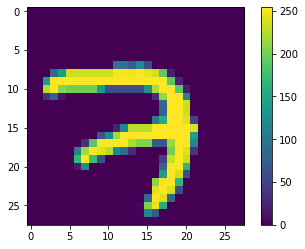

In [9]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하여 정규하는 것이 좋다. 이를 위해 최대값인 255로 나눈다. *훈련 세트*와 *테스트 세트*를 동일한 방식으로 전처리하는 것이 중요하다:

In [10]:
# Data normalization betwee 0 ~ 1
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

*훈련 세트*에서 처음 25개 이미지와 그 아래 클래스 이름을 출력한다. 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마친다.

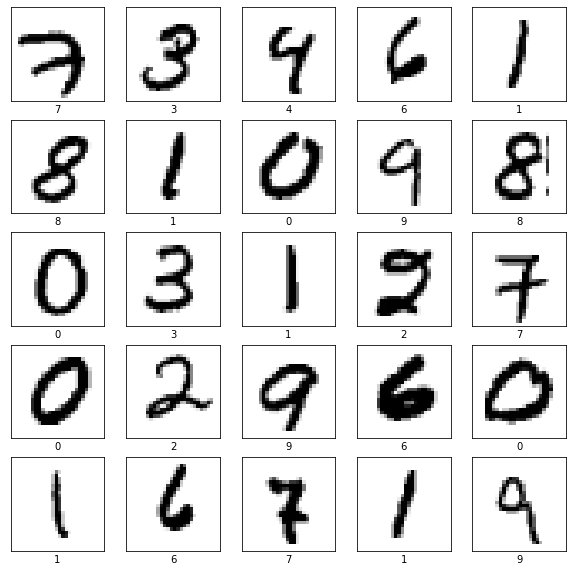

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 모델 구성

신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일한다.

### 층 설정

신경망의 기본 구성 요소는 *층*(layer)입니다. 층은 주입된 데이터에서 표현을 추출한다. 아마도 문제를 해결하는데 더 의미있는 표현이 추출될 것이다.

대부분 딥러닝은 간단한 층을 연결하여 구성된다. `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습된다.

In [12]:
n_inputs = 28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

n_epochs = 5
n_batches = 100

NUM_TRAIN_SAMPLES = 55000

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(n_inputs, n_inputs)),
    keras.layers.Dense(n_hidden1, activation='relu'),
#    keras.layers.Dense(n_hidden1, activation=tf.nn.relu),
#    keras.layers.Dense(n_hidden1), 
#    keras.layers.ReLU(),
    keras.layers.Dense(n_hidden2, activation='relu'),
    keras.layers.Dense(n_outputs, activation='softmax')
])

이 네트워크의 첫 번째 층인 `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환한다. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘린다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 한다.

픽셀을 펼친 후에는 두 개의 `tf.keras.layers.Dense` 층이 연속되어 연결된다. 이 층을 densely-connected 또는 fully-connected layer라고 부릅니다. 첫 번째 `Dense` 층은 300개의 노드(또는 뉴런)를 가집니다. 두 번째층은 100개, 세번째 (마지막) 층은 10개의 노드의 *softmax* 층이다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1이다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력한다.

### 모델 컴파일

모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 *compile* 단계에서 추가된다:

* *Loss function* - 학습하는 동안 모델의 오차를 측정한다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 한다.
* *Optimizer* - 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정한다.
* *Metrics* - 학습 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 *Accuracy*를 사용한다.

In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
#              optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir="logs_10/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

file_writer = tf.summary.create_file_writer(log_dir + "/metrics")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, 
                                                      update_freq=10,
                                                      profile_batch = 0)

## 모델 훈련

신경망 모델을 훈련하는 단계는 다음과 같습니다:

1. 훈련 데이터를 모델에 주입합니다-이 예에서는 `train_images`와 `train_labels` 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 `test_images` 배열입니다. 이 예측이 `test_labels` 배열의 레이블과 맞는지 확인합니다.

훈련을 시작하기 위해 `model.fit` 메서드를 호출하면 모델이 훈련 데이터를 학습합니다:

In [15]:
model.fit(X_train, y_train, epochs=n_epochs,
          batch_size=n_batches,
          shuffle=True,
#          validation_split=0.1,
          validation_data=(X_valid, y_valid),
          validation_freq=1,
          callbacks=[tensorboard_callback]          
         )

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 2s 30us/sample - loss: 1.0602 - accuracy: 0.7454 - val_loss: 0.4949 - val_accuracy: 0.8786
Epoch 2/5
55000/55000 [==============================] - 1s 24us/sample - loss: 0.4296 - accuracy: 0.8858 - val_loss: 0.3530 - val_accuracy: 0.9038
Epoch 3/5
55000/55000 [==============================] - 1s 24us/sample - loss: 0.3470 - accuracy: 0.9027 - val_loss: 0.3025 - val_accuracy: 0.9166
Epoch 4/5
55000/55000 [==============================] - 1s 24us/sample - loss: 0.3080 - accuracy: 0.9131 - val_loss: 0.2755 - val_accuracy: 0.9236
Epoch 5/5
55000/55000 [==============================] - 1s 24us/sample - loss: 0.2816 - accuracy: 0.9208 - val_loss: 0.2527 - val_accuracy: 0.9290


모델이 훈련되면서 손실과 정확도 지표가 출력된다. 이 모델은 훈련 세트에서 약 0.94(94%) 정도의 정확도를 달성한다.

## 정확도 평가

그다음 테스트 세트에서 모델의 성능을 비교합니다:

In [16]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest Accuracy:', test_acc)

10000/10000 - 0s - loss: 0.2573 - accuracy: 0.9273

Test Accuracy: 0.9273


테스트 세트의 정확도가 훈련 세트의 정확도와 비슷하다. 일반적으로 테스트 세트에는 훈련 세트에 없는 인스턴스가 포함되므로 정확도가 조금 낮다. 그러나 두 정확도가 거의 같다는 것은 테스트 세트가 훈련 세트와 유사하다는 것을 의미한다.

### [Practice]
** Training the above network until val_accuracy becpmes larger than 0.99 or n_epoch=100, and check the test accuracy. **

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir ./logs_10/fit

## 예측 만들기

훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있습니다.

In [ ]:
predictions = model.predict(X_test)

여기서는 테스트 세트에 있는 각 이미지의 레이블을 예측했습니다. 첫 번째 예측을 확인해 보죠:

In [ ]:
predictions[0]

이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 숫자에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 찾아보죠:

In [ ]:
np.argmax(predictions[0])

모델은 이 이미지가 '7'이라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해 보죠:

In [ ]:
y_test[0]

10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다:

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해 보겠습니다.

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

몇 개의 이미지의 예측을 출력해 보죠. 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입니다. 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듭니다.

In [ ]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = X_test[0]

print(img.shape)

`tf.keras` 모델은 한 번에 샘플의 묶음 또는 *배치*(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

In [ ]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

이제 이 이미지의 예측을 만듭니다:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=0)

`model.predict`는 2차원 넘파이 배열을 반환하므로 첫 번째 이미지의 예측을 선택합니다:

In [ ]:
np.argmax(predictions_single[0])

이전과 마찬가지로 모델의 예측은 레이블 7입니다.

### Another approach

In [ ]:
# Model construction using 'add' method
# No flattening layer
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(n_hidden1, activation=tf.nn.elu))
model1.add(tf.keras.layers.Dense(n_hidden2, activation=tf.nn.elu))
model1.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))   

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
#              optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir="logs_10/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

file_writer = tf.summary.create_file_writer(log_dir + "/metrics")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, 
                                                      update_freq=10,
                                                      profile_batch = 0)

In [ ]:
# data read and node decaration
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# Flattened 1D data
X_train_1d = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test_1d = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train_1d = y_train.astype(np.int32)
y_test_1d = y_test.astype(np.int32)
#print(X_train_1d.shape, y_train_1d.shape)
#print("X_train[0]=",X_train_1d[0])
#print("y_train[0]=", y_train_1d[0])
#len(y_test_1d)

In [ ]:
# Input should be 1D
# Self validation instead of validation dataset
model1.fit(X_train_1d, y_train_1d, epochs=n_epochs,
          batch_size=n_batches,
          shuffle=True,
          validation_split=0.1,
#          validation_data=(X_valid, y_valid),
          validation_freq=1,
          callbacks=[tensorboard_callback]          
         )

In [ ]:
test_loss, test_acc = model1.evaluate(X_test_1d,  y_test_1d, verbose=2)

print('\nTest Accuracy:', test_acc)

In [ ]:
#%load_ext tensorboard

%tensorboard --logdir logs_10/fit

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

# Exercise
Number of hidden nodes = 300 x 100 = 30,000

Compare the results for smaller number of nodes

Compare the results with less and larger number of hidden layers for the same number of nodes

Batch(train) accuracy should be larger than 0.98. If it is less than 0.98, increase n_epoch.

Fill the tables: test_accuracy and determine the best case.

<table>
  <tr>
    <th>Complexity\N_layers</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
  </tr>
  <tr>
    <td>5000</td>
    <td>5000</td>
    <td>100/50</td>
    <td>25/20/10</td>
  </tr>
  <tr>
    <td>10000</td>
    <td>10000</td>
    <td>100/100</td>
    <td>50/20/10</td>
  </tr>
    <tr>
    <td>30000</td>
    <td>30000</td>
    <td>300/100</td>
    <td>100/30/10</td>
</table>